In [1]:
import sys
!{sys.executable} -m pip install numpy pandas torch torchvision matplotlib scikit-learn

In [2]:
from bpp.preprocess import Preprocess
from bpp.train import Model
from bpp.loaders import PandasGlobLoader
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import pickle
from bpp.util import train_test_split
from bpp.main import plot_august_01_prediction, plot_data

2022-12-11 14:05:34,819 matplotlib data path: /Users/davidblanar/miniforge3/lib/python3.9/site-packages/matplotlib/mpl-data
2022-12-11 14:05:34,822 CONFIGDIR=/Users/davidblanar/.matplotlib
2022-12-11 14:05:34,823 interactive is False
2022-12-11 14:05:34,823 platform is darwin
2022-12-11 14:05:34,857 CACHEDIR=/Users/davidblanar/.matplotlib
2022-12-11 14:05:34,859 Using fontManager instance from /Users/davidblanar/.matplotlib/fontlist-v330.json


In [3]:
data_path = './bpp/data/2017_NYISO_LBMPs/**/*.csv'
window_size = 48
load_zone = 'N.Y.C.'
preprocessed_output_path = './bpp/preprocessed/data.npy'
scaler_output_path = './bpp/preprocessed/scaler.pickle'
test_size = 0.2
hidden_size = 64
num_layers = 2
epochs = 150
learning_rate = 0.002
figures_folder = './bpp/figures'
model_output_path = './bpp/model/model.pickle'

In [4]:
# preprocessing
loader = PandasGlobLoader(data_path)
df = loader.load()
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
preprocess = Preprocess(scaler=min_max_scaler)
preprocessed = preprocess.run(df, window_size=window_size, load_zone=load_zone)
np.save(preprocessed_output_path, preprocessed)
with open(scaler_output_path, 'wb') as handle:
    pickle.dump(preprocess.scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)

/Users/davidblanar/WORK/bpp-assignment/bpp/preprocess.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['scaled_lbmp'] = self.scaler.fit_transform(data['LBMP ($/MWHr)'].values.reshape(-1, 1))


In [5]:
# training
data = np.load(preprocessed_output_path)
X_train, X_test, y_train, y_test = train_test_split(data=data, test_size=test_size)
model = Model(
    X=X_train,
    y=y_train,
    hidden_size=hidden_size,
    num_layers=num_layers,
    epochs=epochs,
    learning_rate=learning_rate,
    figures_folder=figures_folder
)
model.fit()
model.plot_loss()
model.evaluate(X_test, y_test)
with open(model_output_path, 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

2022-12-11 14:05:36,349 Using device: cpu
2022-12-11 14:05:36,360 Training data
2022-12-11 14:05:38,065 Epoch 1/150, loss: 0.6853784918785095
2022-12-11 14:05:41,916 Epoch 2/150, loss: 0.5149897336959839
2022-12-11 14:05:45,729 Epoch 3/150, loss: 0.36595389246940613
2022-12-11 14:05:49,429 Epoch 4/150, loss: 0.23316647112369537
2022-12-11 14:05:53,068 Epoch 5/150, loss: 0.11936549097299576
2022-12-11 14:05:57,005 Epoch 6/150, loss: 0.036839261651039124
2022-12-11 14:06:00,628 Epoch 7/150, loss: 0.010189782828092575
2022-12-11 14:06:04,543 Epoch 8/150, loss: 0.05712571367621422
2022-12-11 14:06:08,297 Epoch 9/150, loss: 0.09909792244434357
2022-12-11 14:06:12,025 Epoch 10/150, loss: 0.08851797878742218
2022-12-11 14:06:15,530 Epoch 11/150, loss: 0.054672542959451675
2022-12-11 14:06:19,375 Epoch 12/150, loss: 0.025761429220438004
2022-12-11 14:06:22,890 Epoch 13/150, loss: 0.011387084610760212
2022-12-11 14:06:26,800 Epoch 14/150, loss: 0.009449402801692486
2022-12-11 14:06:30,317 Epoch

2022-12-11 14:14:03,076 Epoch 126/150, loss: 0.0035751950927078724
2022-12-11 14:14:07,063 Epoch 127/150, loss: 0.003513154573738575
2022-12-11 14:14:10,777 Epoch 128/150, loss: 0.003451897297054529
2022-12-11 14:14:15,061 Epoch 129/150, loss: 0.003391905687749386
2022-12-11 14:14:18,834 Epoch 130/150, loss: 0.003333555767312646
2022-12-11 14:14:22,746 Epoch 131/150, loss: 0.0032769048120826483
2022-12-11 14:14:26,828 Epoch 132/150, loss: 0.003221866674721241
2022-12-11 14:14:30,518 Epoch 133/150, loss: 0.003168547758832574
2022-12-11 14:14:34,581 Epoch 134/150, loss: 0.003117327345535159
2022-12-11 14:14:38,609 Epoch 135/150, loss: 0.0030685649253427982
2022-12-11 14:14:42,425 Epoch 136/150, loss: 0.003022323362529278
2022-12-11 14:14:46,609 Epoch 137/150, loss: 0.0029784825164824724
2022-12-11 14:14:50,741 Epoch 138/150, loss: 0.002937085460871458
2022-12-11 14:14:54,773 Epoch 139/150, loss: 0.0028984122909605503
2022-12-11 14:14:58,648 Epoch 140/150, loss: 0.0028626713901758194
2022

In [6]:
# predictions and plots
with open(scaler_output_path, 'rb') as handle:
    scaler = pickle.load(handle)
with open(model_output_path, 'rb') as handle:
    predictive = pickle.load(handle)
model = Model(X=None, y=None, predictive=predictive, scaler=scaler)
df = PandasGlobLoader(data_path).load()
preprocess = Preprocess(scaler=scaler)
df = preprocess.encode_date(df)

2022-12-11 14:17:50,983 Using device: cpu


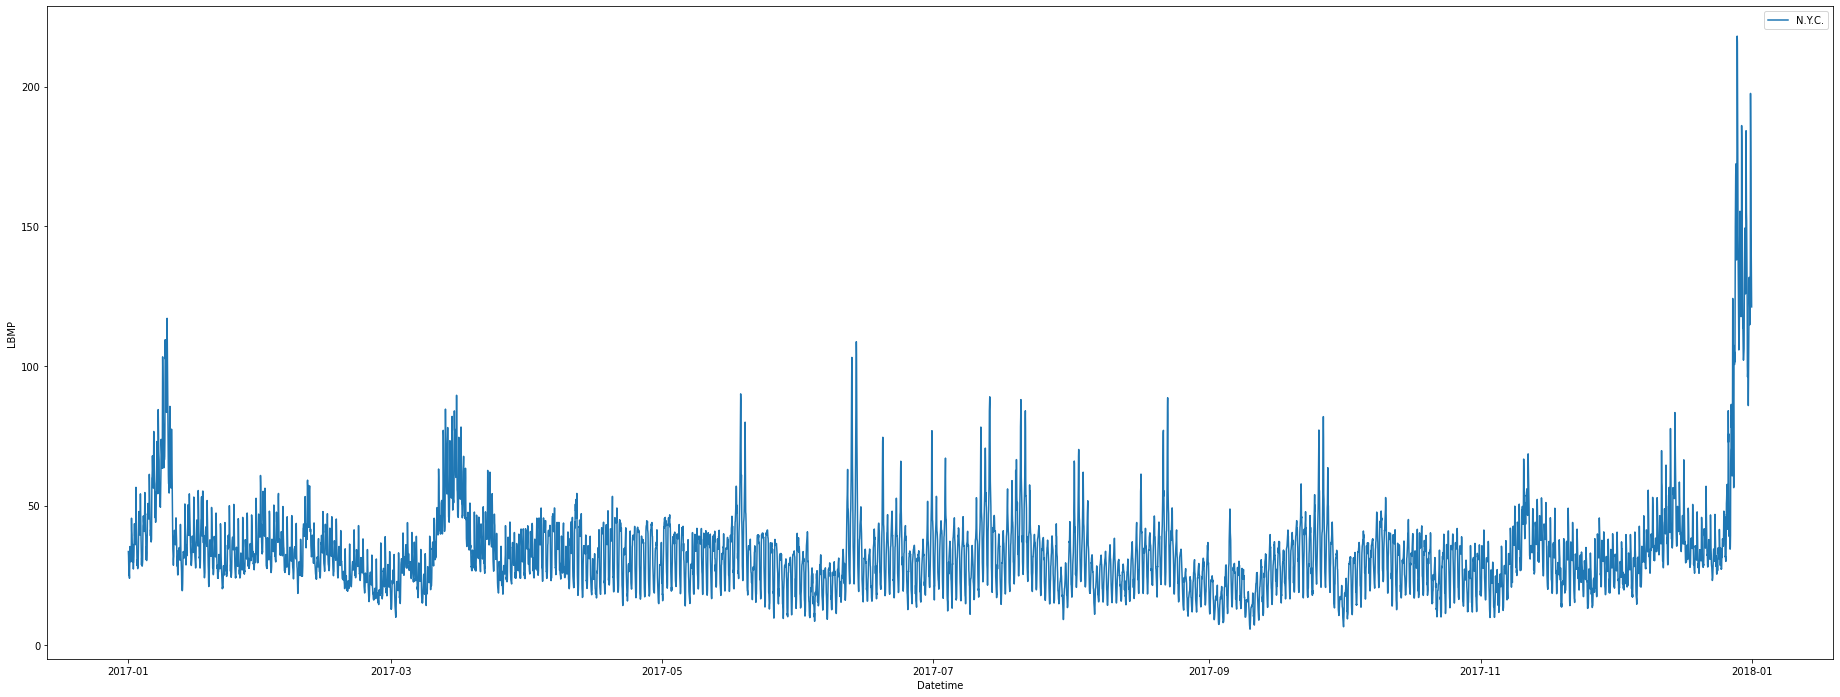

In [7]:
# plot load zone data
plot_data(df=df, names=[load_zone], figsize=(32, 12))

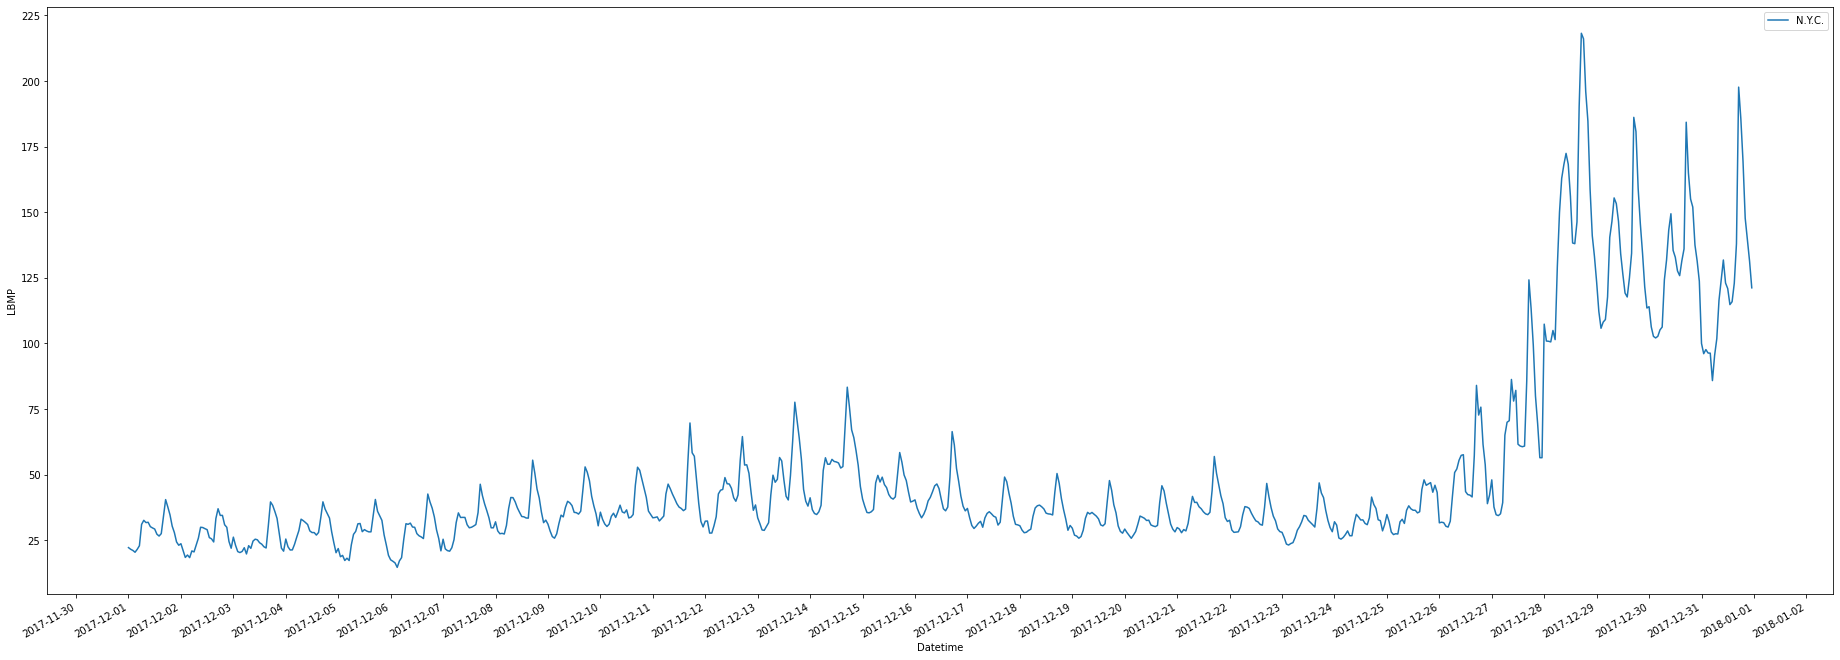

In [8]:
# plot load zone data on a specific interval
plot_data(df=df, figsize=(32, 12), include_dates=True, names=[load_zone], time_between=['2017-12-01 00:00', '2017-12-31 23:00'])

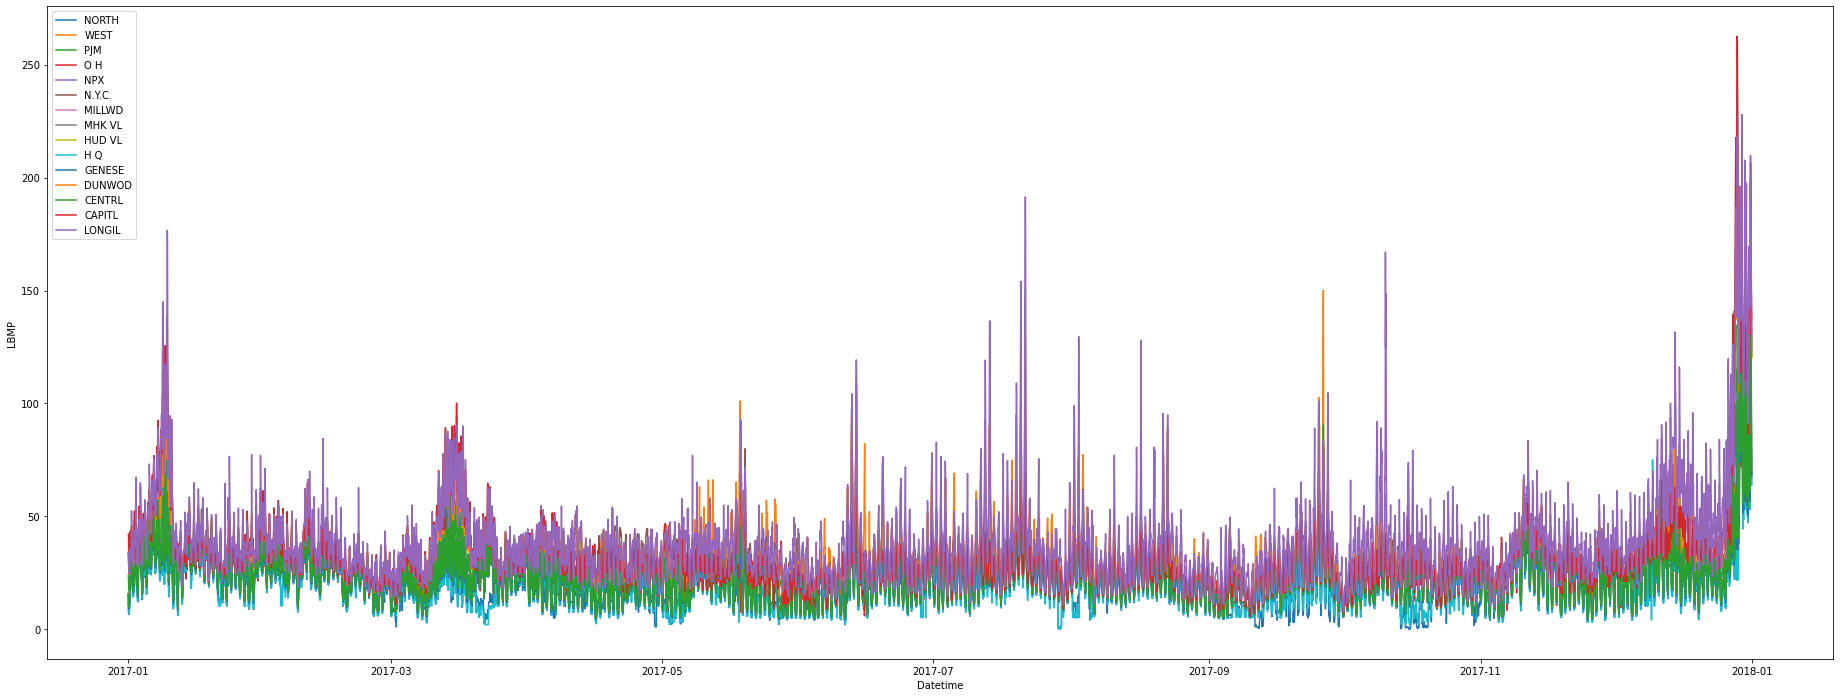

In [9]:
# plot all load zones
plot_data(df=df, figsize=(32, 12))

/Users/davidblanar/WORK/bpp-assignment/bpp/preprocess.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['scaled_lbmp'] = self.scaler.fit_transform(data['LBMP ($/MWHr)'].values.reshape(-1, 1))


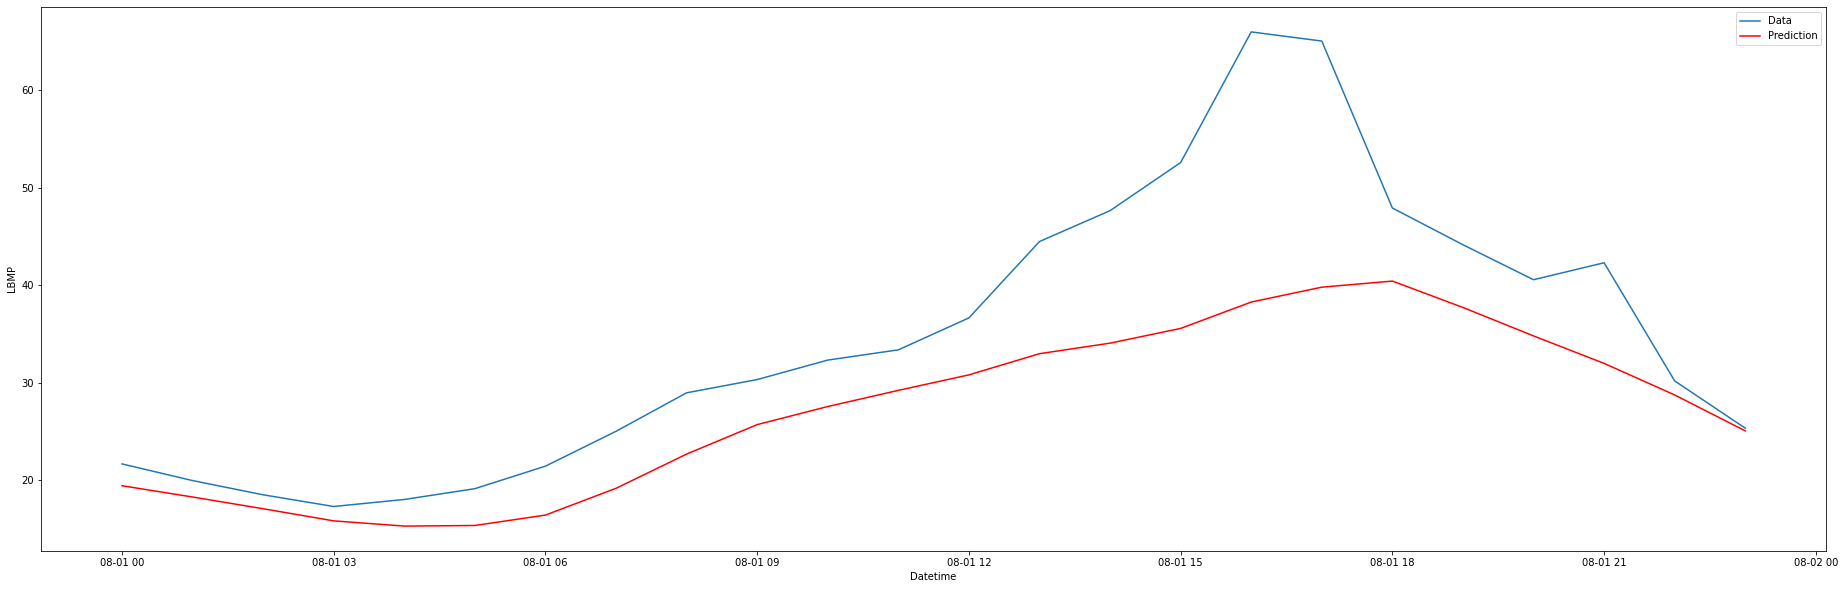

In [10]:
# plot prediction for 01 aug
plot_august_01_prediction(df, preprocess, model, None, load_zone)